# Co-Citation Network Analysis and Visualization

This notebook analyzes a co-citation network generated from Web of Science data.

The network graph is loaded from a GraphML file created by the `build_network.py` script.

We will explore key papers, detect communities (clusters), analyze cluster topics, and look at basic temporal aspects.

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community as community_louvain # For Louvain community detection
from collections import Counter
import math
import random 

# Basic graph analysis

generated by 'build_network.py'

In [56]:
graph_file_path = "data/graphml/1082.graphml" # Make sure this path is correct

In [57]:
try:
    G = nx.read_graphml(graph_file_path)
    print(f"Successfully loaded graph from: {graph_file_path}")
except FileNotFoundError:
    print(f"Error: GraphML file not found at {graph_file_path}")
    print("Please ensure you have run 'build_network.py' successfully.")
    G = None # Set G to None if loading fails

Successfully loaded graph from: data/graphml/1082.graphml


### Information

In [58]:
# Check the number of nodes (cited references) and edges (co-citation links).
if G is not None:
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Number of nodes (Cited References): {num_nodes}")
    print(f"Number of edges (Co-citation Links): {num_edges}")

    # Check if the graph is empty or has no edges, which affects some analyses
    if num_nodes == 0:
        print("\nWarning: The graph has no nodes.")
    elif num_edges == 0:
        print("\nWarning: The graph has nodes but no edges. Co-citation analysis requires edges.")
    else:
        # Check if nodes have 'freq' attribute (important for sizing)
        # Get a sample node's data
        sample_node = list(G.nodes())[0]
        if 'freq' not in G.nodes[sample_node]:
             print("\nWarning: Nodes do not seem to have the 'freq' attribute. Visualization sizing might be affected.")
        if 'year' not in G.nodes[sample_node]:
             print("\nWarning: Nodes do not seem to have the 'year' attribute. Temporal analysis might be limited.")
        # Check if edges have 'weight' attribute
        if num_edges > 0:
            sample_edge = list(G.edges())[0]
            if 'weight' not in G.edges[sample_edge]:
                print("\nWarning: Edges do not seem to have the 'weight' attribute. Community detection might be affected.")


Number of nodes (Cited References): 1082
Number of edges (Co-citation Links): 10608


### Identify the Key Papers (Nodes)

In [59]:
if G is not None and G.number_of_nodes() > 0 and G.number_of_edges() > 0:
    print("\n--- Calculating Node Metrics ---")
    # 1. Frequency (already an attribute)
    node_freq = nx.get_node_attributes(G, 'freq')
    sorted_freq = sorted(node_freq.items(), key=lambda item: item[1], reverse=True)

    # 2. Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

    # 3. Weighted Degree (Strength) - using edge 'weight' attribute
    weighted_degree = dict(G.degree(weight='weight'))
    sorted_weighted_degree = sorted(weighted_degree.items(), key=lambda item: item[1], reverse=True)

    # 4. Betweenness Centrality (Optional - can be slow)
    # Set k=None to compute for all nodes, or set k to a sample size (e.g., k=int(num_nodes*0.1)) for approximation

    # print("Calculating Approximate Betweenness Centrality")
    # try:
    #     # Determine the number of nodes 'k' to sample for approximation
    #     # Let's use ~10% of nodes or a fixed number like 1000, whichever is smaller, but ensure k > 0
    #     num_nodes = G.number_of_nodes()
    #     if num_nodes > 0:
    #         # Adjust sample size based on graph size and desired speed/accuracy
    #         # Option A: Percentage (e.g., 10%)
    #         # k_approx = max(1, int(num_nodes * 0.1))
    #         # Option B: Fixed number or percentage, whichever is smaller
    #         k_approx = min(num_nodes, max(1, int(num_nodes * 0.1)), 1000) # Sample up to 10% or 1000 nodes
    #         print(f"Using k={k_approx} samples for approximation.")

    #         # Calculate approximate betweenness centrality
    #         betweenness_centrality = nx.betweenness_centrality(G,
    #                                                         k=k_approx, # Use the sample size
    #                                                         weight='weight', # Consider edge weights
    #                                                         normalized=True,
    #                                                         seed=42) # Use seed for reproducibility
    #         sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
    #         print("Approximate Betweenness calculation complete.")
    #     else:
    #         print("Graph has no nodes, skipping betweenness centrality.")
    #         sorted_betweenness = []

    # except Exception as e:
    #     print(f"Could not calculate Approximate Betweenness Centrality: {e}")
    #     sorted_betweenness = []


    # --- Display Top Nodes ---
    top_n = 15 # How many top nodes to display

    print(f"\n--- Top {top_n} Cited References by Frequency ---")
    for i, (node, freq) in enumerate(sorted_freq[:top_n]):
        print(f"{i+1}. Freq={freq}: {node}") # Node label is the identifier "AUTHOR, YEAR, SOURCE"



    print(f"\n--- Top {top_n} Cited References by Weighted Degree (Co-citation Strength) ---")
    for i, (node, strength) in enumerate(sorted_weighted_degree[:top_n]):
        print(f"{i+1}. Strength={strength:.2f}: {node}")

    print(f"\n--- Top {top_n} Cited References by Degree Centrality ---")
    for i, (node, degree) in enumerate(sorted_degree[:top_n]):
        print(f"{i+1}. Degree={degree:.4f}: {node}")

    # if sorted_betweenness:
    #     print(f"\n--- Top {top_n} Cited References by Betweenness Centrality ---")
    #     for i, (node, betweenness) in enumerate(sorted_betweenness[:top_n]):
    #         print(f"{i+1}. Betweenness={betweenness:.4f}: {node}")

elif G is not None:
     print("Graph has no edges, cannot calculate centrality metrics.")


--- Calculating Node Metrics ---

--- Top 15 Cited References by Frequency ---
1. Freq=2040: 7
2. Freq=1524: 70
3. Freq=1173: 963
4. Freq=1001: 205
5. Freq=977: 314
6. Freq=872: 905
7. Freq=861: 115
8. Freq=785: 397
9. Freq=735: 943
10. Freq=652: 63
11. Freq=590: 208
12. Freq=571: 848
13. Freq=525: 266
14. Freq=513: 172
15. Freq=487: 806

--- Top 15 Cited References by Weighted Degree (Co-citation Strength) ---
1. Strength=35.91: 384
2. Strength=35.23: 707
3. Strength=34.20: 476
4. Strength=34.01: 908
5. Strength=33.08: 416
6. Strength=32.82: 418
7. Strength=30.55: 48
8. Strength=30.45: 1051
9. Strength=30.14: 819
10. Strength=29.06: 1003
11. Strength=29.05: 26
12. Strength=27.58: 132
13. Strength=25.88: 943
14. Strength=25.52: 874
15. Strength=25.50: 806

--- Top 15 Cited References by Degree Centrality ---
1. Degree=0.1138: 908
2. Degree=0.1018: 48
3. Degree=0.0981: 26
4. Degree=0.0953: 384
5. Degree=0.0907: 115
6. Degree=0.0888: 418
7. Degree=0.0870: 453
8. Degree=0.0851: 70
9. Deg

### Detect Community

In [21]:
# try:
#     from community import best_partition
#     print("Successfully imported best_partition directly:", best_partition)
# except ImportError as e:
#     print("Failed to import best_partition directly:", e)
# except AttributeError as e:
#     print("Got AttributeError trying to import best_partition directly:", e)

Failed to import best_partition directly: cannot import name 'best_partition' from 'community' (c:\Users\jour\anaconda3\envs\yj_env\Lib\site-packages\community\__init__.py)


In [19]:
# import community as community_louvain

# # %% [code]
# if G is not None and G.number_of_nodes() > 0 and G.number_of_edges() > 0:
#     print("\n--- Detecting Communities using Louvain Algorithm ---")
#     # Ensure the graph is treated as undirected for Louvain if it isn't already
#     if nx.is_directed(G):
#         print("Converting graph to undirected for community detection.")
#         graph_for_community = G.to_undirected()
#     else:
#         graph_for_community = G

#     # Partition using edge weights
#     partition = community_louvain.best_partition(graph_for_community, weight='weight', random_state=42)

#     # Add community ID as a node attribute in the original graph G
#     nx.set_node_attributes(G, partition, 'community')

#     num_communities = len(set(partition.values()))
#     print(f"Found {num_communities} communities.")

#     # Optional: Print size of the largest communities
#     community_counts = Counter(partition.values())
#     print("\nSizes of the largest communities:")
#     for comm_id, count in community_counts.most_common(10):
#         print(f"  Community {comm_id}: {count} nodes")
# elif G is not None:
#      print("Graph has no edges, cannot detect communities.")


--- Detecting Communities using Louvain Algorithm ---


AttributeError: module 'community' has no attribute 'best_partition'

In [60]:
import networkx.algorithms.community as nx_comm


In [61]:
if G is not None and G.number_of_nodes() > 0 and G.number_of_edges() > 0:
    print("\n--- Detecting Communities using NetworkX Greedy Modularity Algorithm ---")
    # Ensure the graph is treated as undirected if it isn't already
    if nx.is_directed(G):
        print("Converting graph to undirected for community detection.")
        graph_for_community = G.to_undirected()
    else:
        graph_for_community = G

    try:
        # --- Use nx.community.greedy_modularity_communities ---
        # This function returns a list of sets, where each set is a community.
        print("Running greedy_modularity_communities...")
        # Use 'weight' attribute for modularity calculation
        communities_generator = nx_comm.greedy_modularity_communities(graph_for_community, weight='weight')
        print("Community detection complete.")

        # Convert the list of sets into the partition dictionary format
        # {node: community_id, ...}
        partition = {}
        community_id = 0
        for comm_set in communities_generator:
            for node in comm_set:
                partition[node] = community_id
            community_id += 1

        if not partition:
             print("Warning: Community detection resulted in an empty partition.")
             # Handle cases where no communities are found if necessary
        else:
            # Add community ID as a node attribute in the original graph G
            nx.set_node_attributes(G, partition, 'community')

            num_communities = len(set(partition.values()))
            print(f"Found {num_communities} communities.")

            # Optional: Print size of the largest communities
            community_counts = Counter(partition.values())
            print("\nSizes of the largest communities:")
            for comm_id, count in community_counts.most_common(10):
                print(f"  Community {comm_id}: {count} nodes")

            # Check if the 'community' attribute was added successfully
            sample_node = list(G.nodes())[0]
            if 'community' not in G.nodes[sample_node]:
                 print("\nError: Failed to add 'community' attribute to nodes.")


    except Exception as e:
        print(f"An error occurred during community detection: {e}")
        # Ensure 'community' attribute doesn't exist if detection failed
        if 'community' in G.nodes[list(G.nodes())[0]]:
             # Remove potentially incomplete attribute
             for node in G.nodes(): del G.nodes[node]['community']


elif G is not None:
     print("Graph has no edges, cannot detect communities.")



--- Detecting Communities using NetworkX Greedy Modularity Algorithm ---
Running greedy_modularity_communities...
Community detection complete.
Found 13 communities.

Sizes of the largest communities:
  Community 0: 341 nodes
  Community 1: 314 nodes
  Community 2: 233 nodes
  Community 3: 161 nodes
  Community 4: 9 nodes
  Community 5: 8 nodes
  Community 6: 7 nodes
  Community 7: 4 nodes
  Community 8: 1 nodes
  Community 9: 1 nodes


### Visualization

In [62]:
if G is not None and G.number_of_nodes() > 0 and G.number_of_edges() > 0 and 'community' in G.nodes[list(G.nodes())[0]]:
    print("\n--- Preparing Network Visualization ---")

    plt.figure(figsize=(18, 18)) # Larger figure size

    # Node attributes
    node_sizes = [math.log(max(1, G.nodes[n].get('freq', 1))) * 100 + 10 for n in G.nodes()] # Log scale size, ensure > 0
    node_colors = [G.nodes[n].get('community', 0) for n in G.nodes()] # Color by community

    # Use a layout algorithm (Spring layout is common, adjust parameters for larger graphs)
    # k controls spacing, iterations for convergence. Higher k = more spread out.
    print("Calculating layout (can take time for large graphs)...")
    # Consider using different layouts for large graphs (e.g., nx.kamada_kawai_layout(G, weight='weight'))
    # pos = nx.spring_layout(G, k=0.8 / math.sqrt(G.number_of_nodes()), iterations=50, weight='weight', seed=42)
    pos = nx.kamada_kawai_layout(G, weight='weight')

    print("Layout calculation finished.")


    # Draw the network
    # Draw edges first with low alpha
    nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.5, edge_color='grey')

    # Draw nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                                   cmap=plt.cm.get_cmap('viridis', num_communities), # Color map
                                   alpha=0.8)

    # Add labels for the most frequent nodes (adjust threshold as needed)
    label_threshold_freq = sorted([d.get('freq', 0) for n, d in G.nodes(data=True)], reverse=True)[min(20, G.number_of_nodes()-1)] # Top 20 by freq or fewer
    labels_to_draw = {}
    for node, data in G.nodes(data=True):
        if data.get('freq', 0) >= label_threshold_freq:
             # Shorten label for display? Optional. Keep full for now.
             labels_to_draw[node] = data.get('label', node)

    nx.draw_networkx_labels(G, pos, labels=labels_to_draw, font_size=8, font_color='black')


    plt.title("Co-Citation Network (Nodes sized by Citation Freq, Colored by Community)", fontsize=16)
    plt.axis('off') # Hide axes
    # Optional: Add color bar for communities (can be complex to map discrete colors)
    # plt.colorbar(nodes)
    plt.show()

elif G is not None:
     print("Cannot visualize: Graph has no edges or community detection failed/was skipped")


--- Preparing Network Visualization ---
Calculating layout (can take time for large graphs)...


AttributeError: 'numpy.ufunc' object has no attribute '__module__' and no __dict__ for setting new attributes

<Figure size 1800x1800 with 0 Axes>

### Community topic

In [ ]:
if G is not None and G.number_of_nodes() > 0 and G.number_of_edges() > 0 and 'community' in G.nodes[list(G.nodes())[0]]:
    print("\n--- Analyzing Topics of Major Communities ---")

    communities = sorted(list(set(partition.values())))
    num_major_communities = min(len(communities), 10) # Analyze top 10 largest communities
    top_n_nodes_per_community = 10 # Show top N nodes per community

    # Get community sizes to analyze largest ones first
    community_sizes = Counter(nx.get_node_attributes(G, 'community').values())
    largest_community_ids = [comm_id for comm_id, size in community_sizes.most_common(num_major_communities)]

    for comm_id in largest_community_ids:
        print(f"\n--- Community {comm_id} (Size: {community_sizes[comm_id]}) ---")
        community_nodes = [n for n, data in G.nodes(data=True) if data.get('community') == comm_id]

        # Get metrics for nodes within this community
        community_node_data = {
            node: {
                'freq': G.nodes[node].get('freq', 0),
                'label': G.nodes[node].get('label', node)
                # Add other metrics if needed (e.g., within-community degree)
            } for node in community_nodes
        }

        # Sort nodes within the community by frequency
        sorted_community_nodes = sorted(community_node_data.items(), key=lambda item: item[1]['freq'], reverse=True)

        print(f"Top {top_n_nodes_per_community} most cited references in this community:")
        for i, (node, data) in enumerate(sorted_community_nodes[:top_n_nodes_per_community]):
            print(f"  {i+1}. Freq={data['freq']}: {data['label']}")


--- Analyzing Topics of Major Communities ---

--- Community 0 (Size: 20391) ---
Top 10 most cited references in this community:
  1. Freq=527: ZANELLA A, 2014, IEEE INTERNET THINGS, V1, P22
  2. Freq=316: GUBBI J, 2013, FUTURE GENER COMP SY, V29, P1645
  3. Freq=276: ATZORI L, 2010, COMPUT NETW, V54, P2787
  4. Freq=246: AL-FUQAHA A, 2015, IEEE COMMUN SURV TUT, V17, P2347
  5. Freq=170: ANONYMOUS, 2012, P MCC WORKSH MOB CLO
  6. Freq=149: SANCHEZ L, 2014, COMPUT NETW, V61, P217
  7. Freq=142: SHI WS, 2016, IEEE INTERNET THINGS, V3, P637
  8. Freq=139: GHARAIBEH A, 2017, IEEE COMMUN SURV TUT, V19, P2456
  9. Freq=122: NAKAMOTO S, 2008, BITCOIN PEER TO PEER
  10. Freq=103: MEHMOOD Y, 2017, IEEE COMMUN MAG, V55, P16

--- Community 1 (Size: 16478) ---
Top 10 most cited references in this community:
  1. Freq=761: CARAGLIU A, 2011, J URBAN TECHNOL, V18, P65
  2. Freq=709: ALBINO V, 2015, J URBAN TECHNOL, V22, P3
  3. Freq=560: NEIROTTI P, 2014, CITIES, V38, P25
  4. Freq=500: KITCHIN R, 2

### Time-series Analysis


--- Basic Temporal Analysis (Cited Reference Years) ---
Overall Average Cited Year: 2015.21
Overall Median Cited Year: 2017


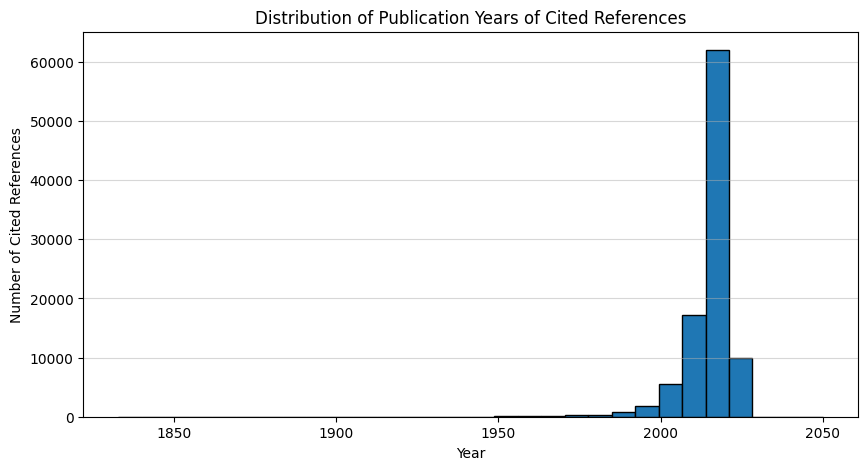


--- Average Cited Year per Major Community ---
  Community 0: Avg. Cited Year = 2016.51
  Community 1: Avg. Cited Year = 2013.45
  Community 2: Avg. Cited Year = 2016.94
  Community 3: Avg. Cited Year = 2018.43
  Community 4: Avg. Cited Year = 2011.62
  Community 5: Avg. Cited Year = 2014.24
  Community 6: Avg. Cited Year = 2011.38
  Community 7: Avg. Cited Year = 2015.02
  Community 8: Avg. Cited Year = 2015.14
  Community 9: Avg. Cited Year = 2012.30


In [54]:
if G is not None and G.number_of_nodes() > 0 and 'year' in G.nodes[list(G.nodes())[0]]:
    print("\n--- Basic Temporal Analysis (Cited Reference Years) ---")

    node_years = nx.get_node_attributes(G, 'year')

    # Convert years to numeric, handling errors/missing values
    numeric_years = []
    for node, year_str in node_years.items():
        try:
            # Handle potential 'UNKNOWN_YEAR' or other non-numeric strings
            if year_str and year_str.isdigit() and 1800 < int(year_str) < 2100:
                 numeric_years.append(int(year_str))
        except (ValueError, TypeError):
            continue # Skip if year is not a valid number

    if numeric_years:
        avg_year = np.mean(numeric_years)
        median_year = np.median(numeric_years)
        print(f"Overall Average Cited Year: {avg_year:.2f}")
        print(f"Overall Median Cited Year: {median_year:.0f}")

        # Plot histogram of cited years
        plt.figure(figsize=(10, 5))
        plt.hist(numeric_years, bins=30, edgecolor='black')
        plt.title("Distribution of Publication Years of Cited References")
        plt.xlabel("Year")
        plt.ylabel("Number of Cited References")
        plt.grid(axis='y', alpha=0.5)
        plt.show()

        # Analyze average year per major community (if communities exist)
        if 'community' in G.nodes[list(G.nodes())[0]]:
            print("\n--- Average Cited Year per Major Community ---")
            community_avg_years = {}
            for comm_id in largest_community_ids: # Use the same largest communities as before
                community_nodes = [n for n, data in G.nodes(data=True) if data.get('community') == comm_id]
                comm_years = []
                for node in community_nodes:
                     year_str = node_years.get(node)
                     try:
                         if year_str and year_str.isdigit() and 1800 < int(year_str) < 2100:
                              comm_years.append(int(year_str))
                     except (ValueError, TypeError):
                         continue
                if comm_years:
                     community_avg_years[comm_id] = np.mean(comm_years)
                     print(f"  Community {comm_id}: Avg. Cited Year = {community_avg_years[comm_id]:.2f}")
                else:
                     print(f"  Community {comm_id}: No valid year data found.")

    else:
        print("No valid numeric year data found for cited references.")